<a href="https://colab.research.google.com/github/studerlukas/Studer-Lukas/blob/main/Midterm_project_JPRC%2C%20LS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Mid Term Project**
### Project carried out by Group 5
Notebook by Juan Pablo Romero Cruz


# 1. Organize your group (5 pts)
https://cloud-new.gdb.tools/index.php/s/scRaYPtdqCe2JaG

# 2. Answer background questions, and upload them to your github (5 pts)

1. Which packages are available for ML? Describe the pros and cons and document the availability.
2. What is Chembl? How do you access it?
3. What is machine learning, and how does it differ from traditional programming?
4. What are the key concepts and techniques in machine learning?
5. What are the different types of machine learning algorithms?
6. What are the common applications of machine learning?
7. How do you evaluate the performance of a machine learning model?
8. How do you prepare data for use in a machine learning model?
9. What are some common challenges in machine learning, and how can they be addressed?
10. What are some resources and tools available to help you learn and practice machine learning?

1. There are numerous packages available for Machine Learning (ML), including Scikit-Learn, TensorFlow, Keras, PyTorch, and many more. Scikit-Learn is a popular and well-documented package that is easy to learn and use, but it may not be the best choice for all use cases. TensorFlow and Keras are powerful packages for deep learning, but they require more advanced programming skills. PyTorch is another powerful package for deep learning that is gaining popularity due to its user-friendly interface and flexibility. 

2. Chembl is a database of bioactive molecules with drug-like properties that can be used in drug discovery and development. It is freely available online and can be accessed through its website, as well as through Python and R.

3. Machine learning is a type of artificial intelligence that enables computers to learn and improve from experience without being explicitly programmed. It differs from traditional programming in that it allows the computer to learn patterns and relationships in data and make predictions or decisions based on that learning, rather than following a fixed set of rules.

4. Key concepts and techniques in machine learning include supervised learning, unsupervised learning, reinforcement learning, deep learning, neural networks, decision trees, clustering, and dimensionality reduction. Techniques for data preprocessing, feature engineering, model selection, and evaluation are also important.

5. The different types of machine learning algorithms include supervised learning algorithms such as linear regression, logistic regression, and support vector machines, unsupervised learning algorithms such as k-means clustering and principal component analysis, and reinforcement learning algorithms such as Q-learning and deep reinforcement learning.

6. Common applications of machine learning include image and speech recognition, natural language processing, recommendation systems, fraud detection, and predictive maintenance.

7. The performance of a machine learning model can be evaluated using metrics such as accuracy, precision, recall, F1 score, and area under the receiver operating characteristic (ROC) curve. Cross-validation and hyperparameter tuning can also be used to optimize model performance.

8. Data preparation for machine learning involves tasks such as data cleaning, feature scaling, feature selection, and data augmentation. It is important to ensure that the data used for training the model is representative of the problem domain and is not biased.

9. Common challenges in machine learning include overfitting, underfitting, imbalanced data, noisy data, and lack of interpretability. These can be addressed through techniques such as regularization, ensemble methods, data balancing, feature selection, and model interpretability methods.

10. There are many resources and tools available to learn and practice machine learning, including online courses such as those offered by Coursera and edX, books such as "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow" by Aurélien Géron, and programming platforms such as Kaggle and Google Colab. Many libraries and packages are also available in programming languages such as Python and R, including Scikit-Learn, TensorFlow, and Keras, which can be used for training and evaluating machine learning models.

# 3. Read tutorial in full before starting anything & answer questions and document the important steps of the process (10 pts)
The tutorial you will follow is below, however we will NOT use their training set.
https://projects.volkamerlab.org/teachopencadd/talktorials/T022_ligand_based_screening_neural_network.html 

The dataset for kinases can be found here (you might need to prepare or alter it):
https://cloud-new.gdb.tools/index.php/s/ZfZM7itQf3rm6Sw
1. What is in the training set, how big is it?
2. What modifications do you need to do to the data set to perform the tutorial.
3. What is a test set? Any other types of set?
4. Before starting describe with 1-2 sentences, in your own words, what is done in each
of the cells.

## Answers
1. The training set is being created as a part of the dataset. In this case, The dataset is split into 70% training set and 30% test set, so the test set contains 70% of the data. In our case, the training set contains roughly 120'000 rows.
2. The data set is downloaded as an excel csv file and uploaded to the google drive. As mentioned above, the dataset has to be split in training set and testt set to performe the tutorial.
3. A test set is type of dataset used to evaluate the performance and generalizing abilitio of a neural network which has been trained before. Is is usually split from the training set. 
In addition to these, there are indeed a number of other sets such as
- Validation set: used during training to fine-tune the model. Used to evaluate the model during training
- Cross-validation set: Technique that involves dividing the dataset into multiple subsets or "folds" and using them for training/testing
-Training set augmentation sets
-Unlabeled set
4. Please see comments in performed tutorial





# 4. Perform the tutorial on either your computer or google colab (10 pts)
Document with screenshots or notebook to get the points.


## **1. Libraries**

In [2]:
#Install all libraries used and silence expected warnings

!pip install rdkit-pypi
from pathlib import Path
from warnings import filterwarnings
filterwarnings("ignore")
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import MACCSkeys, Draw
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

# Neural network specific libraries
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 25.4 MB/s eta 0:00:00


## **2. Data preparation**

In [10]:
# Mounting the data and setting the path

from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/DSF/kinase.csv'
df = pd.read_csv(path, delimiter=',', index_col=0) #creating dataframe from  csv (comma separated values) file
df = df.reset_index(drop=True)
print("Shape of dataframe : ", df.shape) # info about the form of the set, how many rows and columns, info also available in df.info()
df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Shape of dataframe :  (179827, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179827 entries, 0 to 179826
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   molecule_chembl_id  179827 non-null  object 
 1   standard_value      179827 non-null  float64
 2   standard_units      179827 non-null  object 
 3   target_chembl_id    179827 non-null  object 
 4   smiles              179827 non-null  object 
dtypes: float64(1), object(4)
memory usage: 6.9+ MB


In [9]:
df.head() #allows to look at the first 5 rows of the dataframe

,molecule_chembl_id,standard_value,standard_units,target_chembl_id,smiles
0,CHEMBL13462,4000.0,nM,CHEMBL1862,CC(=O)N[C@@H](Cc1ccc(OP(=O)(O)O)cc1)C(=O)N[C@@...
1,CHEMBL13462,16000.0,nM,CHEMBL1862,CC(=O)N[C@@H](Cc1ccc(OP(=O)(O)O)cc1)C(=O)N[C@@...
2,CHEMBL13462,800.0,nM,CHEMBL267,CC(=O)N[C@@H](Cc1ccc(OP(=O)(O)O)cc1)C(=O)N[C@@...
3,CHEMBL13462,9000.0,nM,CHEMBL267,CC(=O)N[C@@H](Cc1ccc(OP(=O)(O)O)cc1)C(=O)N[C@@...
4,CHEMBL13462,1700.0,nM,CHEMBL267,CC(=O)N[C@@H](Cc1ccc(OP(=O)(O)O)cc1)C(=O)N[C@@...


In [24]:
# modify to keep necessary colums and erase others which are not relevant
chembl_df = df[["standard_value", "smiles"]] #the values in nM and the smiles are necessary, id's and units not
chembl_df.info()
chembl_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179827 entries, 0 to 179826
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   standard_value  179827 non-null  float64
 1   smiles          179827 non-null  object 
dtypes: float64(1), object(1)
memory usage: 2.7+ MB


,standard_value,smiles
0,4000.0,CC(=O)N[C@@H](Cc1ccc(OP(=O)(O)O)cc1)C(=O)N[C@@...
1,16000.0,CC(=O)N[C@@H](Cc1ccc(OP(=O)(O)O)cc1)C(=O)N[C@@...
2,800.0,CC(=O)N[C@@H](Cc1ccc(OP(=O)(O)O)cc1)C(=O)N[C@@...
3,9000.0,CC(=O)N[C@@H](Cc1ccc(OP(=O)(O)O)cc1)C(=O)N[C@@...
4,1700.0,CC(=O)N[C@@H](Cc1ccc(OP(=O)(O)O)cc1)C(=O)N[C@@...


In [25]:
# function which converts the smiles strings into numerical data so work can be done on it. A predefined function is used for this purpose

def smiles_to_fp(smiles, method="maccs", n_bits=2048):
    """
    Encode a molecule from a SMILES string into a fingerprint.

    Parameters
    ----------
    smiles : str
        The SMILES string defining the molecule.

    method : str
        The type of fingerprint to use. Default is MACCS keys.

    n_bits : int
        The length of the fingerprint.

    Returns
    -------
    array
        The fingerprint array.
    """

    # Convert smiles to RDKit mol object
    mol = Chem.MolFromSmiles(smiles)

    if method == "maccs":
        return np.array(MACCSkeys.GenMACCSKeys(mol))
    if method == "morgan2":
        return np.array(GetMorganFingerprintAsBitVect(mol, 2, nBits=n_bits))
    if method == "morgan3":
        return np.array(GetMorganFingerprintAsBitVect(mol, 3, nBits=n_bits))
    else:
        print(f"Warning: Wrong method specified: {method}." " Default will be used instead.")
        return np.array(MACCSkeys.GenMACCSKeys(mol))

In [31]:
#converts all Smiles to MACCS (Molecular ACCess System) fingerprints
#--> type of molecular fingerprint used in cheminformatics, binary fingerprints
# encoding molecular structure of a compound into a fixed length bivary vector of 166 bits.
chembl_df["fingerprints_df"] = chembl_df["smiles"].apply(smiles_to_fp)

# Look at head
print("Shape of dataframe:", chembl_df.shape)
chembl_df.head(2)
# NBVAL_CHECK_OUTPUT
# cell takes extremely long to be run, what is the problem here?

Shape of dataframe: (179827, 3)


,standard_value,smiles,fingerprints_df
0,4000.0,CC(=O)N[C@@H](Cc1ccc(OP(=O)(O)O)cc1)C(=O)N[C@@...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,16000.0,CC(=O)N[C@@H](Cc1ccc(OP(=O)(O)O)cc1)C(=O)N[C@@...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [33]:
# Split the data into training and test set
# code adapted, "standard_value" instead of "pIC50" because of different dataset
x_train, x_test, y_train, y_test = train_test_split(
    chembl_df["fingerprints_df"], chembl_df[["standard_value"]], test_size=0.3, random_state=42
)

# Print the shape of training and testing data
print("Shape of training data:", x_train.shape)
print("Shape of test data:", x_test.shape)
# NBVAL_CHECK_OUTPUT

Shape of training data: (125878,)
Shape of test data: (53949,)


## **3. Defining neural network**

In [34]:
# keras model is defined
# specifiyng number of neurons in layers and activation function as arguments.
# two hidden layers defined.
# model compiled using the mse (mean squared error) as a loss argument 
def neural_network_model(hidden1, hidden2):
    """
    Creating a neural network from two hidden layers
    using ReLU as activation function in the two hidden layers
    and a linear activation in the output layer.

    Parameters
    ----------
    hidden1 : int
        Number of neurons in first hidden layer.

    hidden2: int
        Number of neurons in second hidden layer.

    Returns
    -------
    model
        Fully connected neural network model with two hidden layers.
    """

    model = Sequential()
    # First hidden layer
    model.add(Dense(hidden1, activation="relu", name="layer1"))
    # Second hidden layer
    model.add(Dense(hidden2, activation="relu", name="layer2"))
    # Output layer
    model.add(Dense(1, activation="linear", name="layer3"))

    # Compile model
    model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse", "mae"])
    return model



## **4. Train the model**

In [64]:
# Neural network parameters
# different sizes of batches can be tried and the losses are plotted in the next cell
batch_sizes = [180, 360, 720]
nb_epoch = 6
layer1_size = 18
layer2_size = 9

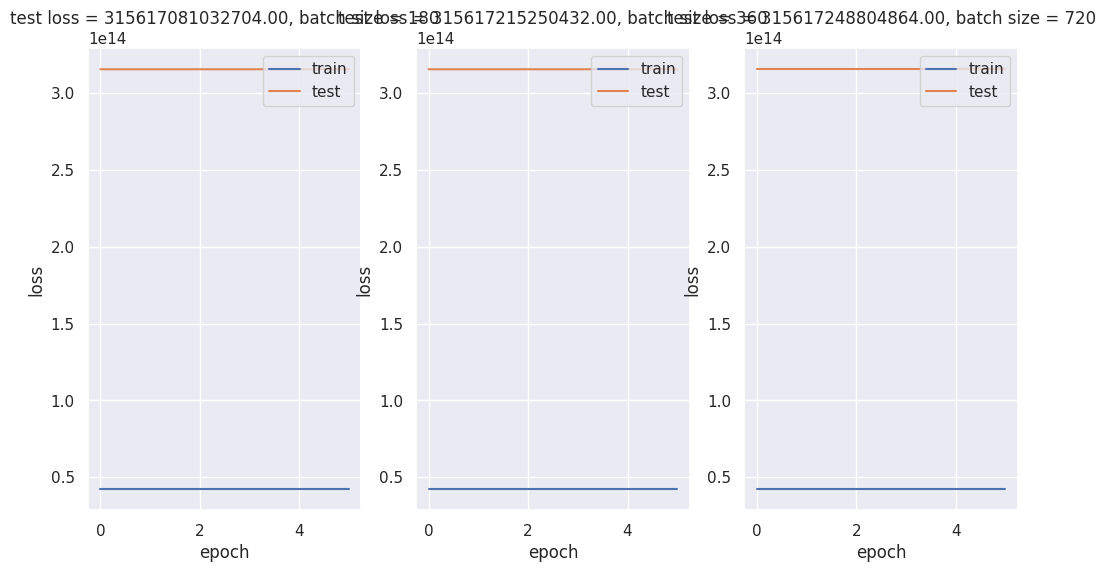

In [65]:
# Plot train vs. test
# batch size determines the speed
fig = plt.figure(figsize=(12, 6))
sns.set(color_codes=True)
for index, batch in enumerate(batch_sizes):
    fig.add_subplot(1, len(batch_sizes), index + 1)
    model = neural_network_model(layer1_size, layer2_size)

    # Fit model on x_train, y_train data
    history = model.fit(
        np.array(list((x_train))).astype(float),
        y_train.values,
        batch_size=batch,
        validation_data=(np.array(list((x_test))).astype(float), y_test.values),
        verbose=0,
        epochs=nb_epoch,
    )
    plt.plot(history.history["loss"], label="train")
    plt.plot(history.history["val_loss"], label="test")
    plt.legend(["train", "test"], loc="upper right")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    #plt.ylim((0, 15))
    plt.title(
        f"test loss = {history.history['val_loss'][nb_epoch-1]:.2f}, " f"batch size = {batch}"
    )
plt.show()

In [67]:
# Save the trained model
# filepath needs to be modified
filepath = "best_weights.hdf5"
checkpoint = ModelCheckpoint(
    str(filepath),
    monitor="loss",
    verbose=0,
    save_best_only=True,
    mode="min",
    save_weights_only=True,
)
callbacks_list = [checkpoint]

# Fit the model
model.fit(
    np.array(list((x_train))).astype(float),
    y_train.values,
    epochs=nb_epoch,
    batch_size=16,
    callbacks=callbacks_list,
    verbose=0,
)

## **5. Evaluation and prediction on test set**

In [68]:
# evaluation of the model to check the perfomance
# reports loss and evaluation metrics
print(f"Evaluate the model on the test data")
scores = model.evaluate(np.array(list((x_test))), y_test.values, verbose=0)
print(f" loss: {scores[0]:.2f}")
print(f" mse (same as loss): {scores[1]:.2f}")
print(f" mae: {scores[2]:.2f}")

Evaluate the model on the test data
 loss: 315615805964288.00
 mse (same as loss): 315615805964288.00
 mae: 137404.17


In [75]:
# Predict standard_values values on x_test dataset
y_pred = model.predict(np.array(list((x_test))))

# Print 5 first standard_values predicted values
first_5_prediction = [print(f"{value[0]:.4f}") for value in y_pred[0:5]]

1686/1686 [==============================] - 2s 1ms/step
2978.3508
10442.7949
8268.0586
11984.5762
10259.0459


### **Scatter plot to visualize predictions**





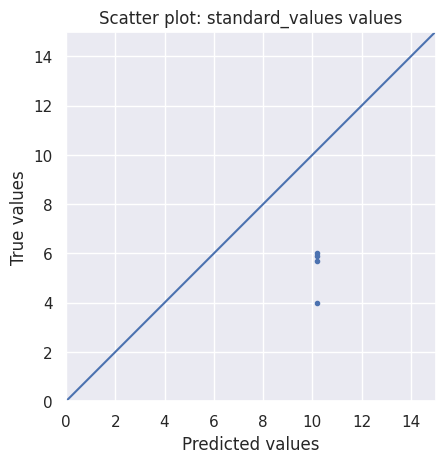

In [70]:
# scatter plot visualizes the the prediction, makes it more comprehensible
limits = 0, 15
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, marker=".")
lin = np.linspace(*limits, 100)
ax.plot(lin, lin)
ax.set_aspect("equal", adjustable="box")
ax.set_xlabel("Predicted values")
ax.set_ylabel("True values")
ax.set_title("Scatter plot: standard_values values")
ax.set_xlim(limits)
ax.set_ylim(limits)
plt.show()

## **6. Prediction on external data**

In [74]:
# Load external/unlabeled data set
external_data = pd.read_csv("test.csv", index_col=0)
external_data = external_data.reset_index(drop=True)
external_data.head()
# NBVAL_CHECK_OUTPUT


FileNotFoundError: ignored

In [ ]:
# Convert SMILES strings to MACCS fingerprints
external_data["fingerprints_df"] = external_data["canonical_smiles"].apply(smiles_to_fp)

# Look at head
print("Shape of dataframe : ", external_data.shape)
external_data.head(3)
# NBVAL_CHECK_OUTPUT

In [ ]:
# Load model
model = load_model(DATA / "ANN_model.hdf5", compile=False)

In [ ]:
# Prediction on external/unlabeled data
predictions = model.predict(
    np.array(list((external_data["fingerprints_df"]))).astype(float), callbacks=callbacks_list
)

predicted_pIC50 = pd.DataFrame(predictions, columns=["predicted_pIC50"])
predicted_pIC50_df = external_data.join(predicted_pIC50)

predicted_pIC50_df.head(3)

In [ ]:
# Save the predicted values in a csv file in the data folder
predicted_pIC50_df.to_csv(DATA / "predicted_pIC50_df.csv")

In [ ]:
# Select top 3 drugs
predicted_pIC50_df = pd.read_csv(DATA / "predicted_pIC50_df.csv", index_col=0)
top3_drug = predicted_pIC50_df.nlargest(3, "predicted_pIC50")
top3_drug

In [ ]:
# Draw the drug molecules
highest_pIC50 = predicted_pIC50_df["canonical_smiles"][top3_drug.index]

mols_EGFR = [Chem.MolFromSmiles(smile) for smile in highest_pIC50]
pIC50_EGFR = top3_drug["predicted_pIC50"].tolist()
pIC50_values = [(f"pIC50 value: {value:.2f}") for value in pIC50_EGFR]

Draw.MolsToGridImage(mols_EGFR, molsPerRow=3, subImgSize=(450, 300), legends=pIC50_values)

# 5. Gain access to Ubelix (5 pts)
Read the documentation: https://hpc-unibe-ch.github.io/
1. What is Ubelix?
2. How do you gain access?
3. How do you submit a job?
4. Who can have access?
5. What resources are available there?


1. Ubelix stands for **U**niversity of **B**ern **Li**nu**x** Cluster and is a the HPC (**H**igh **P**erformance **C**omputing) system from the University of Bern. This cluster consits of an array of 320 conncted nodes which can be managed as a single system.
2. Before you can gain access, your campus account must be activated. You can do so by filling in this [form](https://serviceportal.unibe.ch/hpc). Your account will then be activated by the administrators. Afterwards, a SSH (**S**ecure **Sh**ell) connection can be estabilshed from within network of the university of Bern or while being connected to the VPN.
3. To submit a job, the sbatch command is used for later execution. It is the most common way due to its reusability. The command is used according to the following example:



In [ ]:
sbatch job.sh

3. Along with this command, various terms and conditions on how to job should run can be submitted. For example the used number of nodes, the expected time,  the amount of tasks and many more parameters can be specified. 

4. Anyone owner of a campus account can gain access to Ubelix. The system may then be used for projects or research. External researchers can collab and apply for a campus account to gain access to Ubelix.
5. Both computational power and storage are provided. General workspaces can be crated to simplyfy collaborations. 


# 6. Reuse the code from the tutorial to run the relevant part (training) on Ubelix. Document how you do the code modification and transfer. (10 pts)


# 7. Run the training step on Ubelix (5 pts)
Provide the submission script and the code you run there.


# 8. Other considerations:
You will be using ssh to access Ubelix. It is integrated in the windows power shell and mac
and linux terminals.
Filezilla download: https://filezilla-project.org
Filezilla is used to easily transfer files between servers.
Download the client Terminal cheatsheet (guide for terminal commands):
https://cheatography.com/davechild/cheat-sheets/linux-command-line/